In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Step 1: Load and Explore the Iris Dataset

In [2]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Statistics:")
print(df.describe())

Dataset Shape: (150, 6)

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.

## Step 2: Prepare Data for Regression
We'll use sepal length as the target variable and other features as predictors

In [3]:
# For regression, we'll predict sepal length from other features
X_features = df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_target = df['sepal length (cm)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=0.3, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: 105
Testing set size: 45


## Step 3: Define AIC and BIC Calculation Functions

In [4]:
def calculate_aic(n, mse, num_params):
    """
    Calculate Akaike Information Criterion (AIC)
    n: number of observations
    mse: mean squared error
    num_params: number of parameters in the model
    """
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    """
    Calculate Bayesian Information Criterion (BIC)
    n: number of observations
    mse: mean squared error
    num_params: number of parameters in the model
    """
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic

def evaluate_model(model, X_train, X_test, y_train, y_test, num_params, model_name):
    """
    Evaluate a regression model and calculate AIC, BIC, and other metrics
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Calculate AIC and BIC on training set
    n = len(y_train)
    aic = calculate_aic(n, train_mse, num_params)
    bic = calculate_bic(n, train_mse, num_params)
    
    results = {
        'Model': model_name,
        'Num_Parameters': num_params,
        'Train_MSE': train_mse,
        'Test_MSE': test_mse,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'AIC': aic,
        'BIC': bic
    }
    
    return results, model

print("Functions defined successfully!")

Functions defined successfully!


## Step 4: Build and Evaluate Multiple Regression Models
We'll test several models with increasing complexity:
1. Simple Linear Regression (1 feature)
2. Multiple Linear Regression (2 features)
3. Multiple Linear Regression (3 features)
4. Polynomial Regression (degree 2)
5. Polynomial Regression (degree 3)

In [5]:
# Store all results
results_list = []
models_dict = {}

# Model 1: Simple Linear Regression (1 feature - petal length)
print("Evaluating Model 1: Simple Linear Regression (1 feature)")
X_train_1 = X_train_scaled[:, [1]]  # petal length only
X_test_1 = X_test_scaled[:, [1]]
model1 = LinearRegression()
results1, fitted_model1 = evaluate_model(model1, X_train_1, X_test_1, y_train, y_test, 
                                          num_params=2, model_name='Simple Linear (1 feature)')
results_list.append(results1)
models_dict['Model 1'] = fitted_model1

# Model 2: Multiple Linear Regression (2 features)
print("Evaluating Model 2: Multiple Linear Regression (2 features)")
X_train_2 = X_train_scaled[:, [1, 2]]  # petal length and width
X_test_2 = X_test_scaled[:, [1, 2]]
model2 = LinearRegression()
results2, fitted_model2 = evaluate_model(model2, X_train_2, X_test_2, y_train, y_test, 
                                          num_params=3, model_name='Multiple Linear (2 features)')
results_list.append(results2)
models_dict['Model 2'] = fitted_model2

# Model 3: Multiple Linear Regression (3 features - all)
print("Evaluating Model 3: Multiple Linear Regression (3 features)")
model3 = LinearRegression()
results3, fitted_model3 = evaluate_model(model3, X_train_scaled, X_test_scaled, y_train, y_test, 
                                          num_params=4, model_name='Multiple Linear (3 features)')
results_list.append(results3)
models_dict['Model 3'] = fitted_model3

# Model 4: Polynomial Regression (degree 2)
print("Evaluating Model 4: Polynomial Regression (degree 2)")
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train_scaled)
X_test_poly2 = poly2.transform(X_test_scaled)
model4 = LinearRegression()
num_params_poly2 = X_train_poly2.shape[1] + 1  # features + intercept
results4, fitted_model4 = evaluate_model(model4, X_train_poly2, X_test_poly2, y_train, y_test, 
                                          num_params=num_params_poly2, model_name='Polynomial (degree 2)')
results_list.append(results4)
models_dict['Model 4'] = fitted_model4

# Model 5: Polynomial Regression (degree 3)
print("Evaluating Model 5: Polynomial Regression (degree 3)")
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train_scaled)
X_test_poly3 = poly3.transform(X_test_scaled)
model5 = LinearRegression()
num_params_poly3 = X_train_poly3.shape[1] + 1  # features + intercept
results5, fitted_model5 = evaluate_model(model5, X_train_poly3, X_test_poly3, y_train, y_test, 
                                          num_params=num_params_poly3, model_name='Polynomial (degree 3)')
results_list.append(results5)
models_dict['Model 5'] = fitted_model5

print("\nAll models evaluated successfully!")

Evaluating Model 1: Simple Linear Regression (1 feature)
Evaluating Model 2: Multiple Linear Regression (2 features)
Evaluating Model 3: Multiple Linear Regression (3 features)
Evaluating Model 4: Polynomial Regression (degree 2)
Evaluating Model 5: Polynomial Regression (degree 3)

All models evaluated successfully!


## Step 5: Compare Models Using AIC and BIC

In [6]:
# Create comparison DataFrame
results_df = pd.DataFrame(results_list)

# Sort by AIC and BIC
print("=" * 100)
print("MODEL COMPARISON RESULTS")
print("=" * 100)
print("\nAll Models (sorted by AIC):")
print(results_df.sort_values('AIC').to_string(index=False))

# Find best models
best_aic_model = results_df.loc[results_df['AIC'].idxmin()]
best_bic_model = results_df.loc[results_df['BIC'].idxmin()]

print("\n" + "=" * 100)
print("BEST MODELS")
print("=" * 100)
print(f"\n✓ Best Model by AIC: {best_aic_model['Model']}")
print(f"  - AIC: {best_aic_model['AIC']:.4f}")
print(f"  - Parameters: {best_aic_model['Num_Parameters']}")
print(f"  - Test R²: {best_aic_model['Test_R2']:.4f}")
print(f"  - Test MSE: {best_aic_model['Test_MSE']:.4f}")

print(f"\n✓ Best Model by BIC: {best_bic_model['Model']}")
print(f"  - BIC: {best_bic_model['BIC']:.4f}")
print(f"  - Parameters: {best_bic_model['Num_Parameters']}")
print(f"  - Test R²: {best_bic_model['Test_R2']:.4f}")
print(f"  - Test MSE: {best_bic_model['Test_MSE']:.4f}")

MODEL COMPARISON RESULTS

All Models (sorted by AIC):
                       Model  Num_Parameters  Train_MSE  Test_MSE  Train_R2  Test_R2         AIC         BIC
Multiple Linear (3 features)               4   0.097741  0.098117  0.857890 0.852584 -236.170828 -225.554987
       Polynomial (degree 2)              10   0.088251  0.102710  0.871688 0.845684 -234.894906 -208.355302
       Polynomial (degree 3)              20   0.077284  0.115199  0.887633 0.826920 -228.828511 -175.749304
Multiple Linear (2 features)               3   0.162524  0.162771  0.763698 0.755445 -184.777554 -176.815673
   Simple Linear (1 feature)               2   0.170985  0.154795  0.751396 0.767429 -181.448660 -176.140739

BEST MODELS

✓ Best Model by AIC: Multiple Linear (3 features)
  - AIC: -236.1708
  - Parameters: 4
  - Test R²: 0.8526
  - Test MSE: 0.0981

✓ Best Model by BIC: Multiple Linear (3 features)
  - BIC: -225.5550
  - Parameters: 4
  - Test R²: 0.8526
  - Test MSE: 0.0981


## Step 6: Visualize Model Comparison

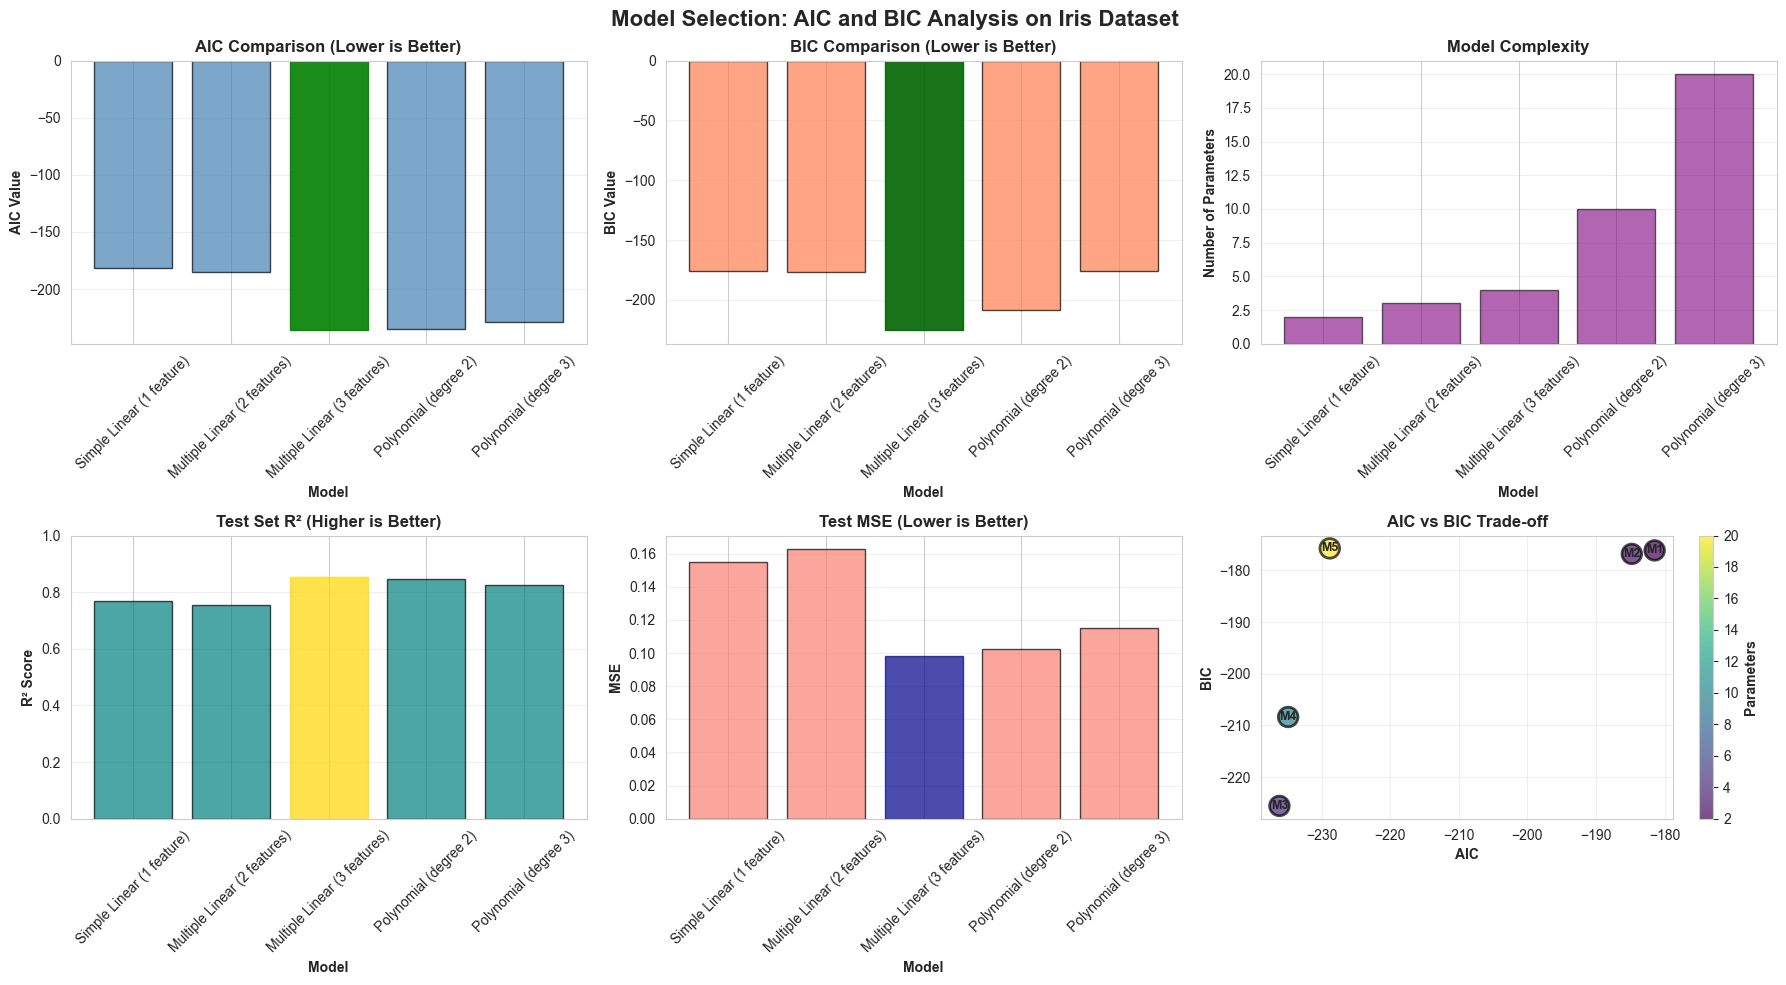

In [7]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Selection: AIC and BIC Analysis on Iris Dataset', fontsize=16, fontweight='bold')

# 1. AIC Comparison
ax1 = axes[0, 0]
bars1 = ax1.bar(results_df['Model'], results_df['AIC'], color='steelblue', alpha=0.7, edgecolor='black')
best_aic_idx = results_df['AIC'].idxmin()
bars1[best_aic_idx].set_color('green')
bars1[best_aic_idx].set_alpha(0.9)
ax1.set_xlabel('Model', fontweight='bold')
ax1.set_ylabel('AIC Value', fontweight='bold')
ax1.set_title('AIC Comparison (Lower is Better)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# 2. BIC Comparison
ax2 = axes[0, 1]
bars2 = ax2.bar(results_df['Model'], results_df['BIC'], color='coral', alpha=0.7, edgecolor='black')
best_bic_idx = results_df['BIC'].idxmin()
bars2[best_bic_idx].set_color('darkgreen')
bars2[best_bic_idx].set_alpha(0.9)
ax2.set_xlabel('Model', fontweight='bold')
ax2.set_ylabel('BIC Value', fontweight='bold')
ax2.set_title('BIC Comparison (Lower is Better)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Number of Parameters
ax3 = axes[0, 2]
ax3.bar(results_df['Model'], results_df['Num_Parameters'], color='purple', alpha=0.6, edgecolor='black')
ax3.set_xlabel('Model', fontweight='bold')
ax3.set_ylabel('Number of Parameters', fontweight='bold')
ax3.set_title('Model Complexity', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# 4. Test R² Score
ax4 = axes[1, 0]
bars4 = ax4.bar(results_df['Model'], results_df['Test_R2'], color='teal', alpha=0.7, edgecolor='black')
best_r2_idx = results_df['Test_R2'].idxmax()
bars4[best_r2_idx].set_color('gold')
ax4.set_xlabel('Model', fontweight='bold')
ax4.set_ylabel('R² Score', fontweight='bold')
ax4.set_title('Test Set R² (Higher is Better)', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylim([0, 1])
ax4.grid(axis='y', alpha=0.3)

# 5. Test MSE
ax5 = axes[1, 1]
bars5 = ax5.bar(results_df['Model'], results_df['Test_MSE'], color='salmon', alpha=0.7, edgecolor='black')
best_mse_idx = results_df['Test_MSE'].idxmin()
bars5[best_mse_idx].set_color('darkblue')
ax5.set_xlabel('Model', fontweight='bold')
ax5.set_ylabel('MSE', fontweight='bold')
ax5.set_title('Test MSE (Lower is Better)', fontweight='bold')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', alpha=0.3)

# 6. AIC vs BIC Scatter
ax6 = axes[1, 2]
scatter = ax6.scatter(results_df['AIC'], results_df['BIC'], 
                     c=results_df['Num_Parameters'], cmap='viridis', 
                     s=200, alpha=0.7, edgecolors='black', linewidth=2)
for i, model in enumerate(results_df['Model']):
    ax6.annotate(f"M{i+1}", (results_df['AIC'].iloc[i], results_df['BIC'].iloc[i]), 
                fontsize=9, ha='center', va='center', fontweight='bold')
ax6.set_xlabel('AIC', fontweight='bold')
ax6.set_ylabel('BIC', fontweight='bold')
ax6.set_title('AIC vs BIC Trade-off', fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax6)
cbar.set_label('Parameters', fontweight='bold')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Detailed Analysis and Insights

In [8]:
print("=" * 100)
print("DETAILED ANALYSIS")
print("=" * 100)

# Calculate AIC and BIC differences
results_df['AIC_diff'] = results_df['AIC'] - results_df['AIC'].min()
results_df['BIC_diff'] = results_df['BIC'] - results_df['BIC'].min()

print("\nAIC and BIC Differences from Best Model:")
print(results_df[['Model', 'AIC', 'AIC_diff', 'BIC', 'BIC_diff']].to_string(index=False))

print("\n" + "-" * 100)
print("KEY INSIGHTS:")
print("-" * 100)

print("\n1. MODEL COMPLEXITY vs PERFORMANCE:")
print(f"   - Simplest model has {results_df['Num_Parameters'].min()} parameters")
print(f"   - Most complex model has {results_df['Num_Parameters'].max()} parameters")
print(f"   - Best AIC model has {best_aic_model['Num_Parameters']} parameters")
print(f"   - Best BIC model has {best_bic_model['Num_Parameters']} parameters")

print("\n2. AIC vs BIC PENALTY:")
print("   - BIC penalizes complexity more heavily than AIC")
if best_aic_model['Num_Parameters'] > best_bic_model['Num_Parameters']:
    print("   - BIC selected a simpler model (fewer parameters)")
elif best_aic_model['Num_Parameters'] < best_bic_model['Num_Parameters']:
    print("   - AIC selected a simpler model (fewer parameters)")
else:
    print("   - Both AIC and BIC selected the same model")

print("\n3. OVERFITTING ANALYSIS:")
for idx, row in results_df.iterrows():
    r2_diff = row['Train_R2'] - row['Test_R2']
    if r2_diff > 0.1:
        print(f"   ⚠ {row['Model']}: Potential overfitting (Train R² - Test R² = {r2_diff:.4f})")
    else:
        print(f"   ✓ {row['Model']}: Good generalization (Train R² - Test R² = {r2_diff:.4f})")

print("\n4. RECOMMENDATION:")
if best_aic_model['Model'] == best_bic_model['Model']:
    print(f"   ★ BEST MODEL: {best_aic_model['Model']}")
    print(f"     Both AIC and BIC agree on this model!")
    print(f"     - Achieves Test R²: {best_aic_model['Test_R2']:.4f}")
    print(f"     - With only {best_aic_model['Num_Parameters']} parameters")
    print(f"     - Optimal balance between fit and complexity")
else:
    print(f"   ★ AIC recommends: {best_aic_model['Model']} (Test R²: {best_aic_model['Test_R2']:.4f})")
    print(f"   ★ BIC recommends: {best_bic_model['Model']} (Test R²: {best_bic_model['Test_R2']:.4f})")
    print(f"\n   → For production: Consider BIC's recommendation (simpler, less prone to overfitting)")
    print(f"   → For research: AIC's recommendation may capture more relationships")

print("\n" + "=" * 100)

DETAILED ANALYSIS

AIC and BIC Differences from Best Model:
                       Model         AIC  AIC_diff         BIC  BIC_diff
   Simple Linear (1 feature) -181.448660 54.722169 -176.140739 49.414248
Multiple Linear (2 features) -184.777554 51.393274 -176.815673 48.739314
Multiple Linear (3 features) -236.170828  0.000000 -225.554987  0.000000
       Polynomial (degree 2) -234.894906  1.275923 -208.355302 17.199685
       Polynomial (degree 3) -228.828511  7.342318 -175.749304 49.805683

----------------------------------------------------------------------------------------------------
KEY INSIGHTS:
----------------------------------------------------------------------------------------------------

1. MODEL COMPLEXITY vs PERFORMANCE:
   - Simplest model has 2 parameters
   - Most complex model has 20 parameters
   - Best AIC model has 4 parameters
   - Best BIC model has 4 parameters

2. AIC vs BIC PENALTY:
   - BIC penalizes complexity more heavily than AIC
   - Both AIC and B

## Step 8: Visualize Predictions of Best Model

Visualizing predictions for: Multiple Linear (3 features)



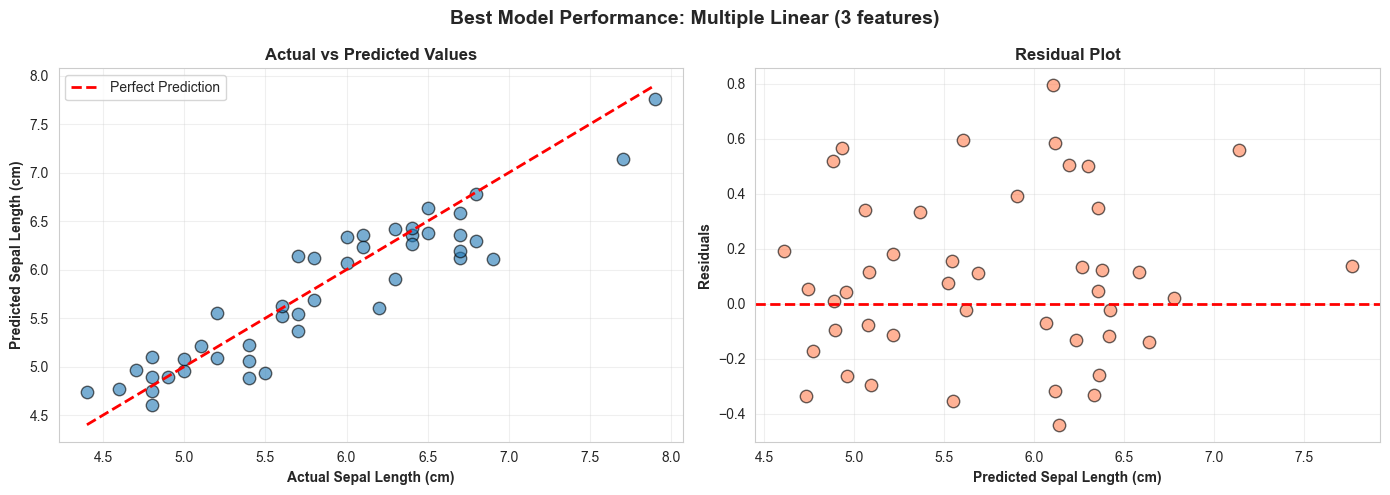


Residual Statistics:
  Mean Residual: 0.089235
  Std Residual: 0.3037
  Min Residual: -0.4396
  Max Residual: 0.7944


In [9]:
# Get the best model according to BIC (more conservative)
best_model_name = best_bic_model['Model']
print(f"Visualizing predictions for: {best_model_name}\n")

# Get appropriate predictions based on model type
if 'Simple Linear (1 feature)' in best_model_name:
    best_model = models_dict['Model 1']
    y_pred = best_model.predict(X_test_scaled[:, [1]])
elif 'Multiple Linear (2 features)' in best_model_name:
    best_model = models_dict['Model 2']
    y_pred = best_model.predict(X_test_scaled[:, [1, 2]])
elif 'Multiple Linear (3 features)' in best_model_name:
    best_model = models_dict['Model 3']
    y_pred = best_model.predict(X_test_scaled)
elif 'Polynomial (degree 2)' in best_model_name:
    best_model = models_dict['Model 4']
    y_pred = best_model.predict(X_test_poly2)
else:
    best_model = models_dict['Model 5']
    y_pred = best_model.predict(X_test_poly3)

# Create prediction visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Best Model Performance: {best_model_name}', fontsize=14, fontweight='bold')

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.6, s=80, edgecolors='black', linewidth=1)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Sepal Length (cm)', fontweight='bold')
axes[0].set_ylabel('Predicted Sepal Length (cm)', fontweight='bold')
axes[0].set_title('Actual vs Predicted Values', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residuals plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6, s=80, edgecolors='black', linewidth=1, color='coral')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Sepal Length (cm)', fontweight='bold')
axes[1].set_ylabel('Residuals', fontweight='bold')
axes[1].set_title('Residual Plot', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print residual statistics
print("\nResidual Statistics:")
print(f"  Mean Residual: {residuals.mean():.6f}")
print(f"  Std Residual: {residuals.std():.4f}")
print(f"  Min Residual: {residuals.min():.4f}")
print(f"  Max Residual: {residuals.max():.4f}")

## Conclusion

### Summary:
This analysis demonstrated the use of AIC and BIC metrics for model selection on the Iris dataset:

1. **Model Comparison**: We evaluated 5 different regression models ranging from simple (1 feature) to complex (polynomial degree 3)

2. **AIC vs BIC**: 
   - AIC tends to favor more complex models with better fit
   - BIC penalizes complexity more heavily, preferring simpler models
   - Both help avoid overfitting while maintaining good predictive performance

3. **Trade-off**: The best model balances:
   - Goodness of fit (low MSE, high R²)
   - Model complexity (fewer parameters)
   - Generalization ability (similar train/test performance)

4. **Practical Application**: 
   - Use BIC when interpretability and simplicity are priorities
   - Use AIC when capturing more complex relationships is important
   - Always validate with test set performance metrics

### Key Takeaways:
- Lower AIC/BIC values indicate better models
- BIC is more conservative (prefers simpler models)
- Model selection should consider both statistical criteria and domain knowledge
- Visual inspection of residuals helps validate model assumptions